In [7]:
from pyspark.sql import SparkSession

spark = (
    SparkSession.builder.config("spark.sql.warehouse.dir", "spark-warehouse")
    .enableHiveSupport()
    .getOrCreate()
)

<AxesSubplot:xlabel='run_id'>

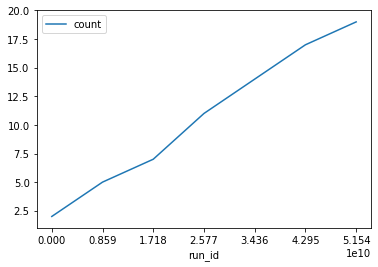

In [38]:
import pandas as pd
from pyspark.sql import functions as F

df = spark.table("ga_result2").groupBy("run_id").count()
df = df.sort(df.run_id.asc())
df = df.withColumn("run_id", F.monotonically_increasing_id())

pd = df.toPandas()
pd.plot(
    x="run_id",
    y="count",
    ylim=(pd["count"].min() - 1, pd["count"].max() + 1),
    xticks=pd["run_id"],
)

<AxesSubplot:xlabel='run_id'>

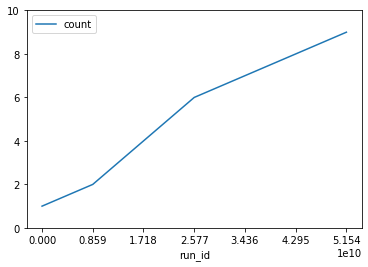

In [40]:
df = spark.table("ga_result2")
df = df.filter(df.status == "Fail").groupBy("run_id").count().sort(df.run_id.asc())
df = df.withColumn("run_id", F.monotonically_increasing_id())

pd = df.toPandas()
pd.plot(
    x="run_id",
    y="count",
    ylim=(pd["count"].min() - 1, pd["count"].max() + 1),
    xticks=pd["run_id"],
)